# PUNTO 3 - ALEJANDRA RUIZ

## LECTURA DEL ARCHIVO WINE QUALITY

In [4]:
import pandas as pd

wine = pd.read_excel(r"D:\MAESTRIA CIENCIA DE DATOS\Analisis Cuantitativo\datasets\datos.xls", 
                     sheet_name="Wine Quality",
                     header=2)
wine

,Calidad del Vino,Acidez Fija,Acidez Volátil,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,pH,Sulfatos,Alcohol
0,6,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,6,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,5,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,7,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


### ELIMINAR COLUMNAS

In [5]:
wine.drop(columns=['pH','Sulfatos','Acidez Volátil','Acidez Fija','Calidad del Vino'],
          inplace=True)

### VERIFICO QUE TODAS LAS VARIABLES TENGAN EL TIPO DE DATO CORRECTO Y QUE NO HAYAN NULOS

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ácido Cítrico            4898 non-null   float64
 1   Azúcar Residual          4898 non-null   float64
 2   Cloruros                 4898 non-null   float64
 3   Dióxido de Azúfre Libre  4898 non-null   float64
 4   Dióxido de Azúfre Total  4898 non-null   float64
 5   Densidad                 4898 non-null   float64
 6   Alcohol                  4898 non-null   float64
dtypes: float64(7)
memory usage: 268.0 KB


## ESTANDARIZAR

### HACEMOS USO DE LA LIBRERÍA SKLEARN 

In [8]:
from sklearn.preprocessing import StandardScaler

In [46]:
# Inicializando el escalador
scaler = StandardScaler()

# Ajustando y transformando los datos
standard_wine = pd.DataFrame(scaler.fit_transform(wine), columns=wine.columns)

In [47]:
standard_wine

,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
0,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.393152
1,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,-0.824276
2,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,-0.336667
3,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,-0.499203
4,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,-0.499203
...,...,...,...,...,...,...,...
4893,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.557282
4894,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.743008
4895,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-0.905544
4896,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.857572


## CÁLCULO DE LAS CORRELACIONES

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

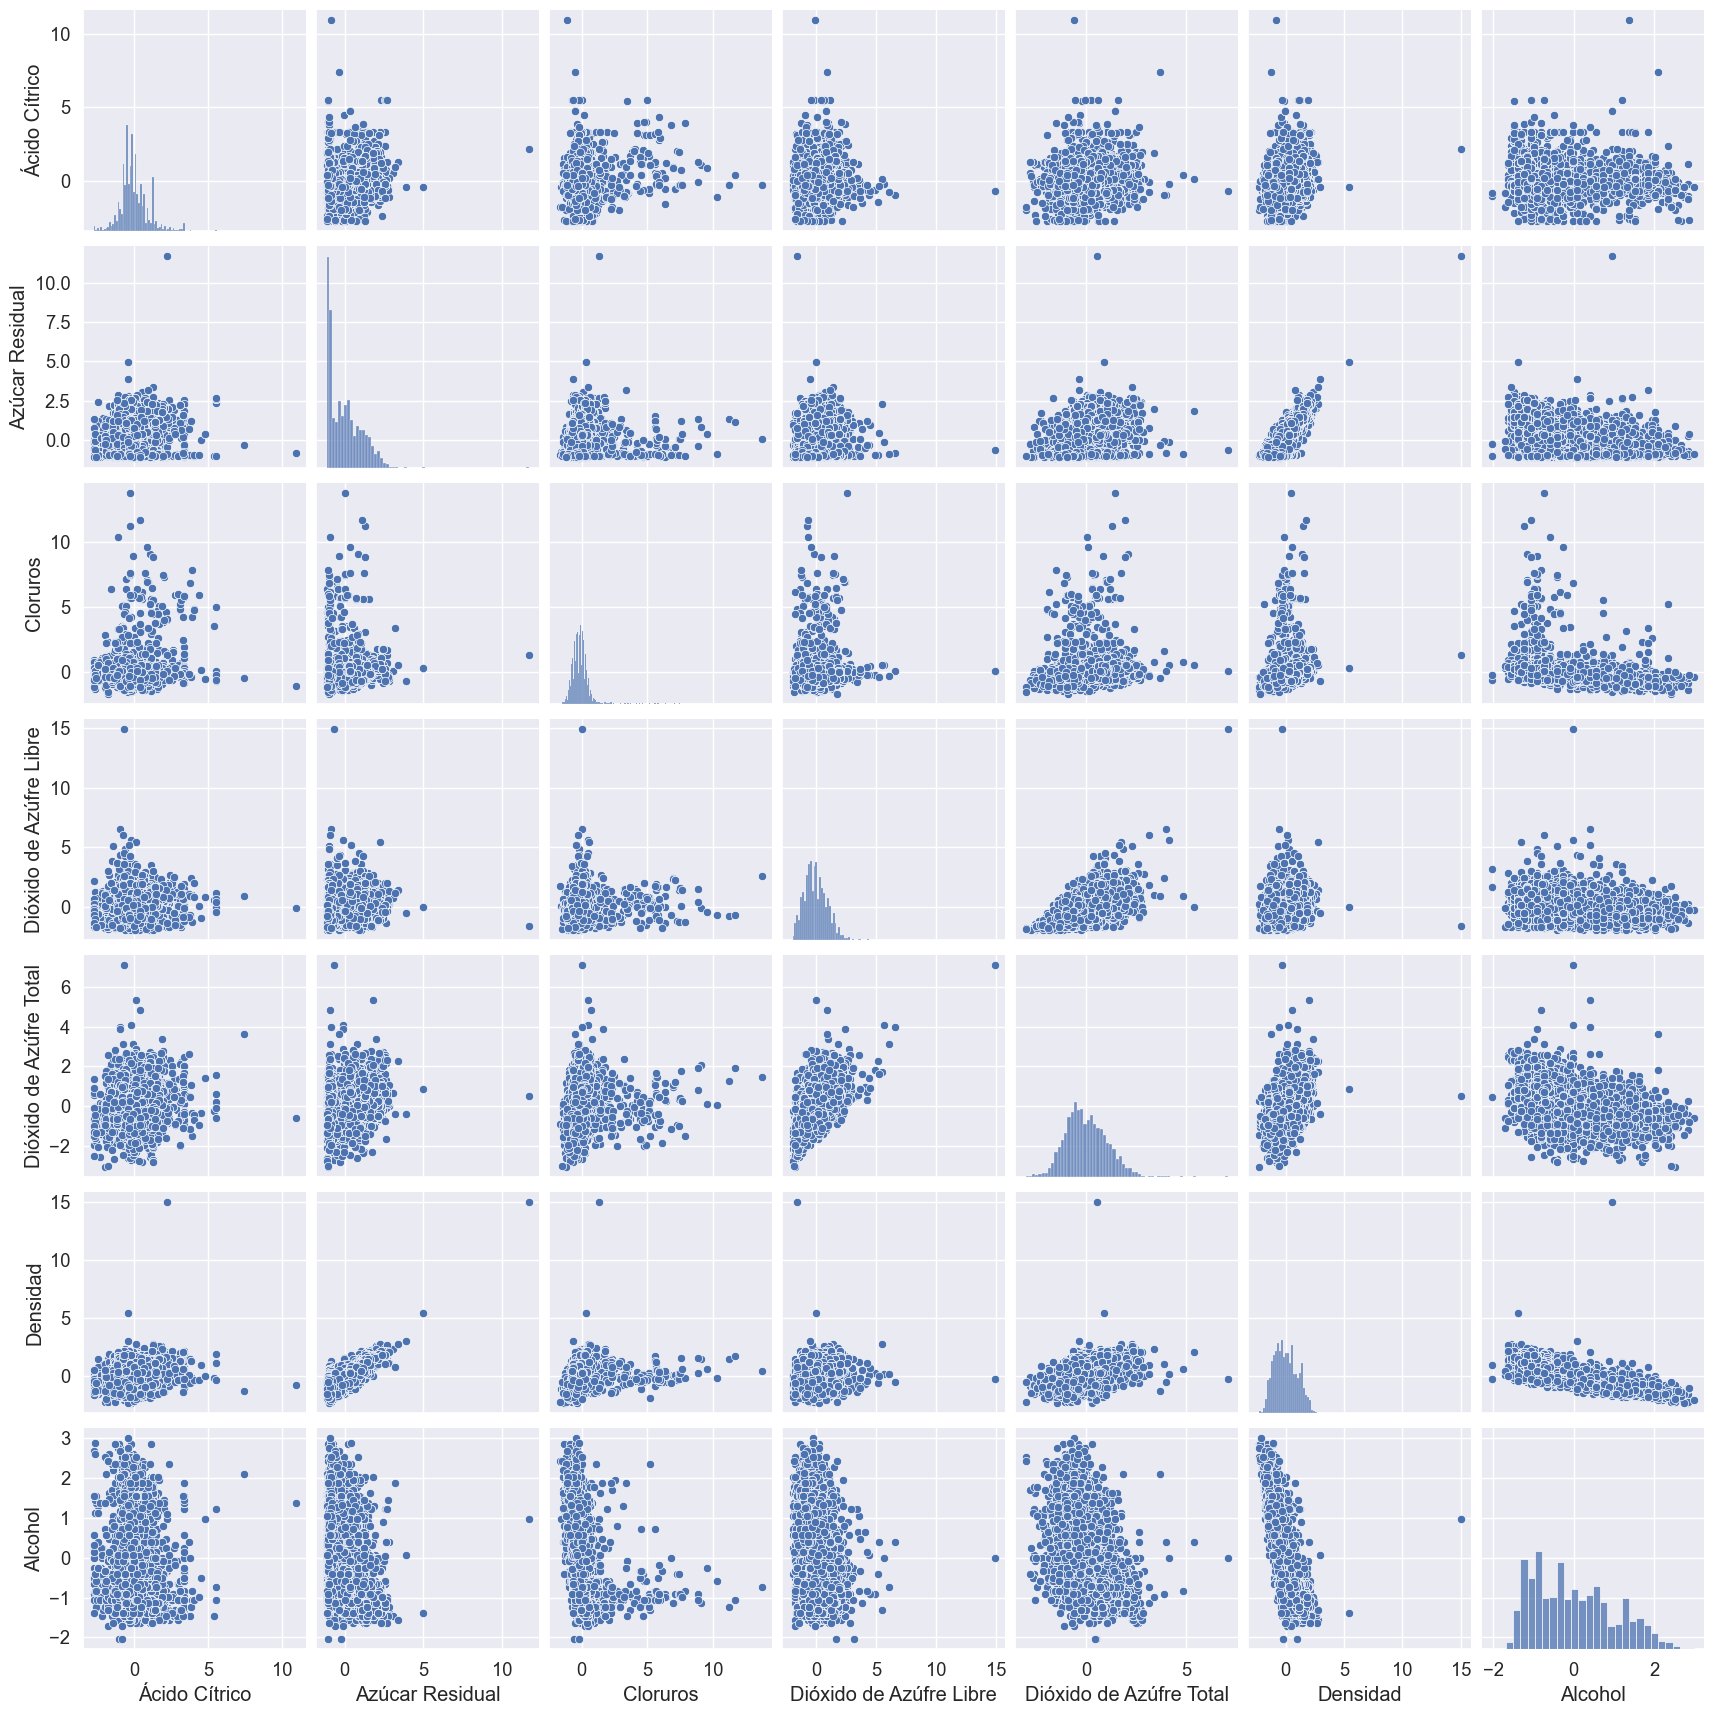

In [21]:
sns.pairplot(standard_wine)
plt.show()

### PEARSON

In [17]:
corr_pearson = standard_wine.corr(method='pearson').reset_index(drop=True)

In [25]:
sns.set(font_scale=1.0)

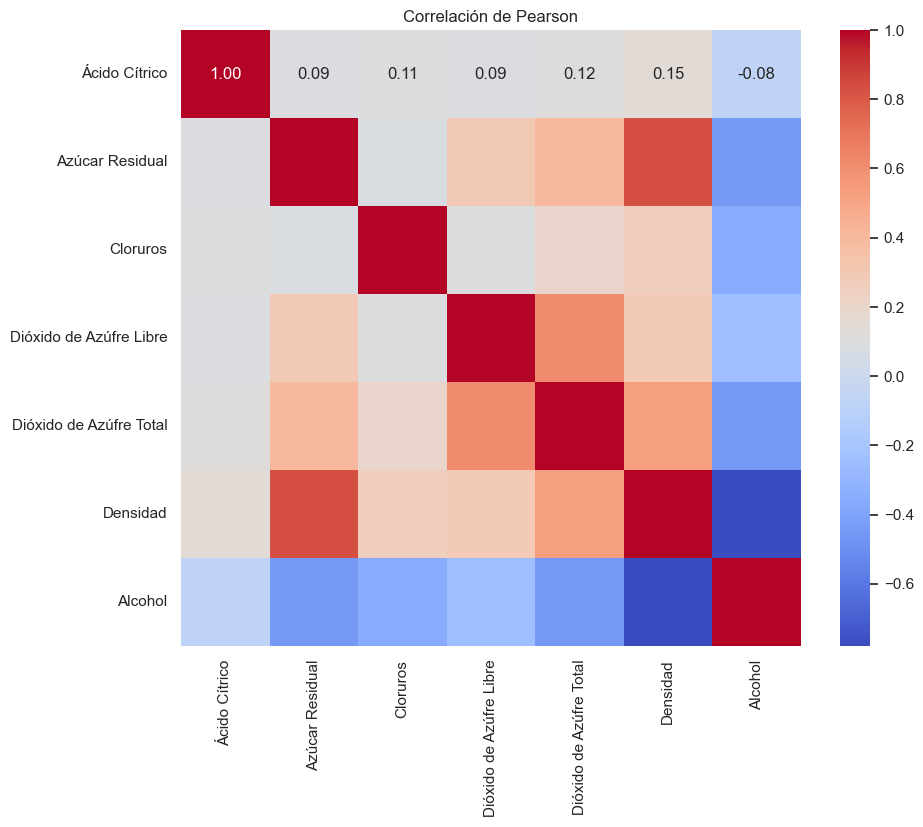

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=standard_wine.columns, yticklabels=standard_wine.columns)
plt.title("Correlación de Pearson")
plt.show()

##### La mayor correlación contra la variable Y (Densidad) Es con  Alcohol de manera negativa (-0.78), Ázucar Residual de manera positiva (0.84), y una correlación media (0.53) con Dióxido de Azúfre Total

In [35]:
corr_pearson

,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
0,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.075729
1,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.450631
2,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.360189
3,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.250104
4,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,-0.448892
5,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.780138
6,-0.075729,-0.450631,-0.360189,-0.250104,-0.448892,-0.780138,1.000000


### KENDALL

In [31]:
corr_kendall = standard_wine.corr(method='kendall').reset_index(drop=True)

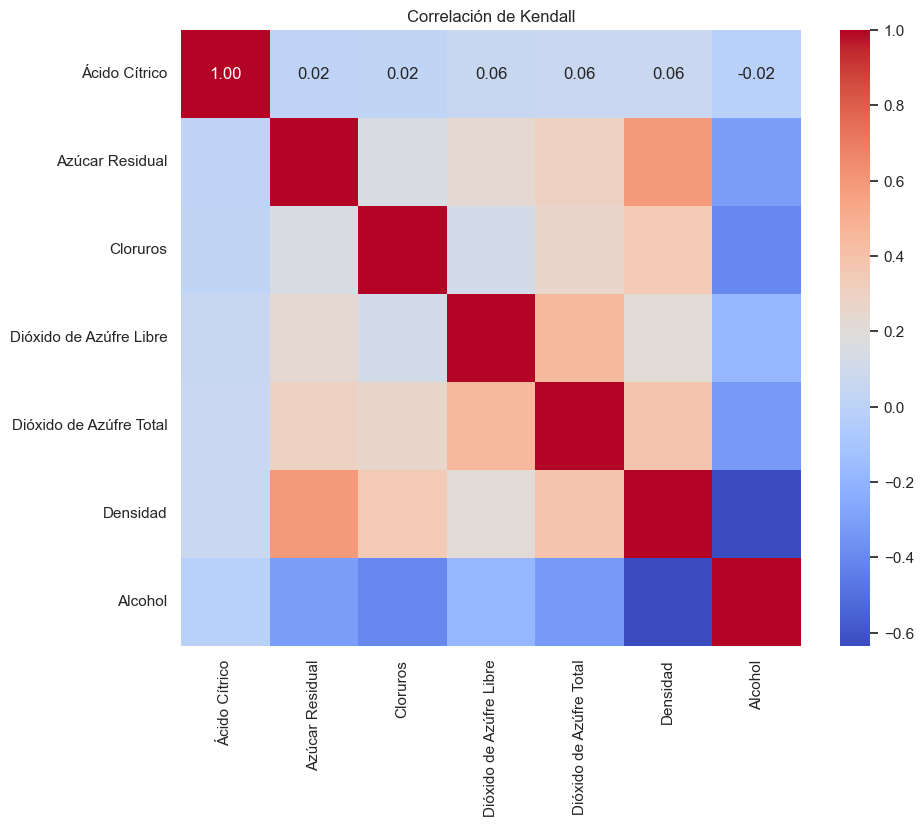

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_kendall, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=standard_wine.columns, yticklabels=standard_wine.columns)
plt.title("Correlación de Kendall")
plt.show()

##### Comparando frente a Pearson, la correlación fuerte que tenía Densidad y Ázucar Residual disminuyó (0.59) significativamente, y con Alcohol también bajó pero no tanto (-0.64). Incrementó de forma negativa un poco la correlación de Ácido Cítrico frente a todas las variables.

In [36]:
corr_kendall

,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
0,1.000000,0.015329,0.022292,0.060809,0.062188,0.061542,-0.019981
1,0.015329,1.000000,0.155274,0.236748,0.293319,0.588989,-0.305601
2,0.022292,0.155274,1.000000,0.113851,0.257075,0.349119,-0.404039
3,0.060809,0.236748,0.113851,1.000000,0.444696,0.217295,-0.182539
4,0.062188,0.293319,0.257075,0.444696,1.000000,0.388378,-0.325826
5,0.061542,0.588989,0.349119,0.217295,0.388378,1.000000,-0.635104
6,-0.019981,-0.305601,-0.404039,-0.182539,-0.325826,-0.635104,1.000000


### SPEARMAN

In [37]:
corr_spearman = standard_wine.corr(method='spearman').reset_index(drop=True)

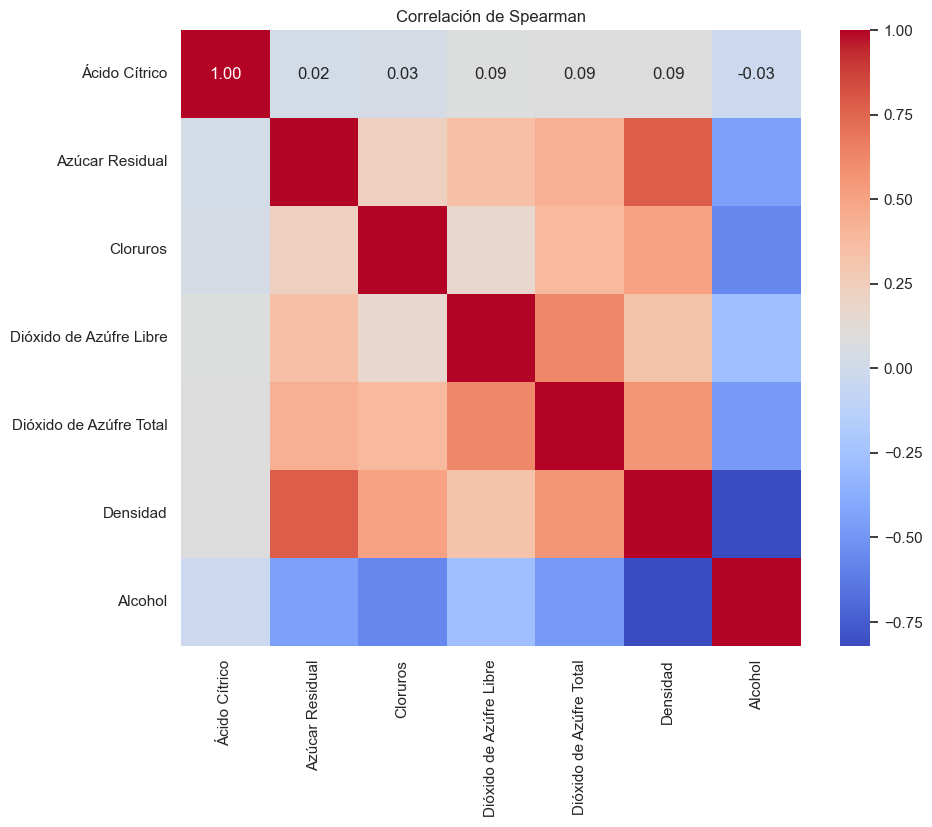

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=standard_wine.columns, yticklabels=standard_wine.columns)
plt.title("Correlación de Spearman")
plt.show()

In [41]:
corr_spearman

,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
0,1.000000,0.024621,0.032659,0.088314,0.093219,0.091425,-0.029170
1,0.024621,1.000000,0.227844,0.346107,0.431252,0.780365,-0.445257
2,0.032659,0.227844,1.000000,0.167046,0.375244,0.508302,-0.570806
3,0.088314,0.346107,0.167046,1.000000,0.618616,0.327822,-0.272569
4,0.093219,0.431252,0.375244,0.618616,1.000000,0.563824,-0.476619
5,0.091425,0.780365,0.508302,0.327822,0.563824,1.000000,-0.821855
6,-0.029170,-0.445257,-0.570806,-0.272569,-0.476619,-0.821855,1.000000


##### Con Spearman frente a Pearson, bajó pero muy poco la correlación entre Densidad y Ázucar Residual, pero incrementó la correlación frente a las demás variables incluída Alcohol, exceptuando Ácido Cítrico. Recordemos que Pearson es más sencible a los Outliers, y como podemos observar en el diagrama de dispersión, el de Ázucar vs Densidad, hay varios outliars, que aunque están alineados con los demás, esto puede estar generando un incremento en la correlación vs el de Spearman.

## MODELADO

### PARTICIÓN DEL DATASET

In [42]:
from sklearn.model_selection import train_test_split

In [48]:
y = standard_wine['Densidad']
X = standard_wine.drop(columns='Densidad')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Calcular ˆβ(⋅) y ˆβ0(·) ESTIMADORES MÍNIMOS CUADRADOS con Pearson, Generar y Evaluar el Modelo

#### Separar la Matriz de Correlación, dejar sólo entre las Variables X y dejar la de la Variable Y con X (Como Densidad es la Penúltima Columna, significa que la penúltima fila también representa la correlación de la X con Y -Densidad-)

In [58]:
p_xy = corr_pearson['Densidad']
p_xx = corr_pearson.drop(columns='Densidad')
indice_penultima_fila = p_xx.index[-2]  # Obtener el índice de la penúltima fila
p_xx = p_xx.drop(index=indice_penultima_fila)
p_xy = p_xy.drop(index=p_xy.index[-2])

In [59]:
p_xy

0    0.149503
1    0.838966
2    0.257211
3    0.294210
4    0.529881
6   -0.780138
Name: Densidad, dtype: float64

#### Invertir la Matriz de Correlación entre las Variables X

In [55]:
import numpy as np

In [61]:
inv_pxx = np.linalg.inv(p_xx)

#### MULTIPLIACIÓN DE MATRICES PARA CALCULAR BETA

In [62]:
beta = np.dot(inv_pxx, p_xy)

In [63]:
beta

array([ 0.04912064,  0.5980971 ,  0.01421093, -0.08283074,  0.12203417,
       -0.46771405])

#### OBTENER LA MEDIA DE X y Y (ˆμY ˆμX)

In [64]:
mu_Y = y_train.mean()
mu_X = X_train.mean()

#### CALCULAR BETA0

In [65]:
beta_0 = mu_Y - np.dot(mu_X, beta)

#### MODELO

In [69]:
y_pred_test = np.dot(X_test, beta) + beta_0

In [70]:
y_pred_test

array([-4.48681074e-01,  4.70796910e-01, -5.76152127e-01, -9.57462920e-01,
        8.27468996e-01,  5.74656484e-01, -7.21273130e-01, -8.64718189e-01,
       -8.58474351e-01,  1.12970887e+00,  5.76218024e-01,  1.49882313e+00,
       -6.72752109e-02,  8.40139093e-01, -1.20062581e+00,  1.74791180e-01,
       -9.48106367e-01, -2.77098525e-01, -1.52960108e+00, -9.28489859e-01,
       -3.49483675e-01, -6.51397067e-01,  2.72396093e-01,  2.17620979e-01,
       -2.93183313e-01, -4.75892543e-01,  4.46788601e-01,  9.11166788e-01,
       -1.22271151e+00, -3.28653646e-01,  1.38584383e+00, -4.82501047e-01,
       -7.95613578e-01, -1.28487625e+00,  9.72758966e-01, -5.08201020e-01,
       -3.78916387e-01,  1.63828228e+00, -1.16456947e+00, -4.20114858e-01,
       -9.67897057e-03, -3.84147181e-01, -1.98561244e-01,  1.38541343e+00,
        1.40847179e+00, -1.03685699e+00,  1.12717922e+00, -1.12467256e+00,
       -1.31749298e+00,  4.82841331e-02, -6.66647571e-01, -8.36455259e-01,
       -3.49036975e-01,  

#### CALCULAR ERROR CUADRÁTICO MEDIO (MSE), LA RAIZ DEL ERROR (RMSE) Y EL COEFICIENTE DE DETERMINACIÓN (R²)

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

In [74]:
mse

0.13755303612153544

In [75]:
rmse

0.370881431351767

In [76]:
r2

0.8810170491518581

### REPETIR EL PROCESO PARA KENDALL

In [78]:
p_xy = corr_kendall['Densidad']
p_xx = corr_kendall.drop(columns='Densidad')
indice_penultima_fila = p_xx.index[-2]  # Obtener el índice de la penúltima fila
p_xx = p_xx.drop(index=indice_penultima_fila)
p_xy = p_xy.drop(index=p_xy.index[-2])

In [79]:
inv_pxx = np.linalg.inv(p_xx)

In [80]:
beta_kendall = np.dot(inv_pxx, p_xy)

In [81]:
beta_0 = mu_Y - np.dot(mu_X, beta_kendall)

In [82]:
y_pred_test_kendall = np.dot(X_test, beta_kendall) + beta_0

In [83]:
mse = mean_squared_error(y_test, y_pred_test_kendall)
print(f"mse: {mse}")
rmse = np.sqrt(mse)
print(f"rmse: {rmse}")
r2 = r2_score(y_test, y_pred_test_kendall)
print(f"r2: {r2}")

mse: 0.20428729823767142
rmse: 0.45198152422158966
r2: 0.8232921188040059


### REPETIR EL PROCESO PARA SPEARMAN

In [85]:
p_xy = corr_spearman['Densidad']
p_xx = corr_spearman.drop(columns='Densidad')
indice_penultima_fila = p_xx.index[-2]  # Obtener el índice de la penúltima fila
p_xx = p_xx.drop(index=indice_penultima_fila)
p_xy = p_xy.drop(index=p_xy.index[-2])

In [86]:
inv_pxx = np.linalg.inv(p_xx)

In [87]:
beta_spearman = np.dot(inv_pxx, p_xy)

In [88]:
beta_0 = mu_Y - np.dot(mu_X, beta_spearman)

In [89]:
y_pred_test_spearman = np.dot(X_test, beta_spearman) + beta_0

In [90]:
mse = mean_squared_error(y_test, y_pred_test_spearman)
print(f"mse: {mse}")
rmse = np.sqrt(mse)
print(f"rmse: {rmse}")
r2 = r2_score(y_test, y_pred_test_spearman)
print(f"r2: {r2}")

mse: 0.1598208640101793
rmse: 0.39977601730241313
r2: 0.8617554468937412


## PRUEBA DE HIPÓTESIS

### ANALIZAR LOS RESIDUOS DEL MODELO CON PEARSON

In [91]:
residuos = y_test - y_pred_test

In [92]:
residuos

2762   -0.082107
42     -0.011818
1419   -0.235516
3664   -0.469466
2125   -0.268176
          ...   
2111    0.193262
1828    0.323108
1256    0.141493
3335   -0.011934
230     0.096304
Name: Densidad, Length: 980, dtype: float64

#### INDEPENDENCIA (PRUEBA DE DURBIN WATSON)

In [95]:
pip install statsmodels --upgrade


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
    --------------------------------------- 0.2/9.8 MB 6.7 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/9.8 MB 6.8 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.8 MB 8.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.8 MB 9.5 MB/s eta 0:00:01
   ------- -------------------------------- 1.8/9.8 MB 8.2 MB/s eta 0:00:01
   -------- ------------------------------- 2.1/9.8 MB 7.9 MB/s eta 0:00:01
   --------- ------------------------------ 2.4/9.8 MB 7.7 MB/s eta 0:00:01
   ----------- ---------------------------- 2.9/9.8 MB 7.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/9.8 MB 8.3 MB/s eta 0:00:01
   --------------- ------------------------ 3.9/9.8 MB 8.6 MB/s eta 0:00:01
   ----------------- ---------------------- 4.3/9.8 MB 8.7 MB/s eta 0:00:01
   ------------------- -------------------- 4.8/9.8 MB 8.8 MB/s eta 0:00:01
   ---------------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\aleja\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [96]:
from scipy import stats
from statsmodels.stats.stattools import durbin_watson

In [97]:
dw = durbin_watson(residuos)

In [98]:
dw

1.9122533543275961

##### Valores del estadístico Durbin-Watson cercanos a 2 sugieren que no hay autocorrelación, valores significativamente menores que 2 indican autocorrelación positiva, y valores significativamente mayores que 2 indican autocorrelación negativa. Buscamos que NO haya autocorrelación

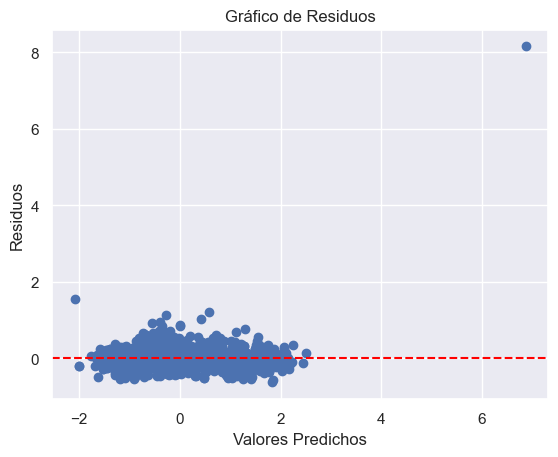

In [93]:
# Graficar los residuos
plt.scatter(y_pred_test, residuos)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Residuos')
plt.show()

#### NORMALIDAD (SHAPIRO WILKS)

In [99]:
shapiro_test = stats.shapiro(residuos)
print(f"Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

Shapiro-Wilk test statistic: 0.5886951684951782, p-value: 4.540207024412407e-43


##### AL SER UN P-VALUE TAN PEQUEÑO (Menor a 0.05) RECHAZAMOS LA HIÓTESIS, POR TANTO DECIMOS QUE NO HAY NORMALIDAD

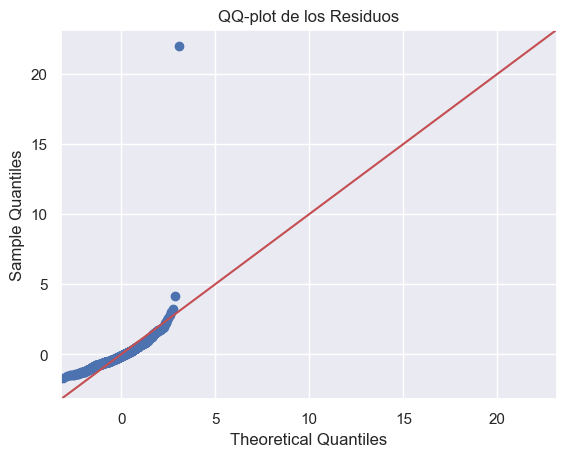

In [100]:
import statsmodels.api as sm
sm.qqplot(residuos, line ='45', fit=True)
plt.title('QQ-plot de los Residuos')
plt.show()

##### DESPUÉS DE VER EL GRÁFICO, EFECTIVAMENTE LOS PUNTOS NO ESTÁN TAN ENCIMA DE LA RECTA TEÓRICA

#### MEDIA CERO (Valor Esperado de Ei = 0 -One Sample t-test)

In [101]:
from scipy.stats import ttest_1samp

t_statistic, p_value = ttest_1samp(residuos, 0)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 1.0024556826995998
P-value: 0.31637126431723644


##### ESTA VEZ EL P-VALUE ES MAYOR A 0.05 POR TANTO NO SE RECHAZA LA HIPÓTESIS

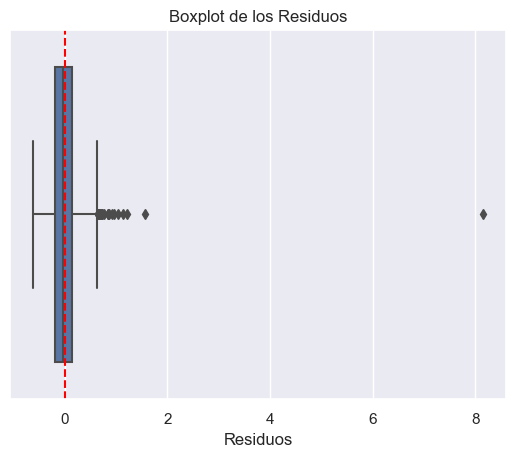

In [102]:
sns.boxplot(x=residuos)
plt.title('Boxplot de los Residuos')
plt.xlabel('Residuos')
plt.axvline(x=0, color='red', linestyle='--')  # Línea en x=0 para referencia
plt.show()

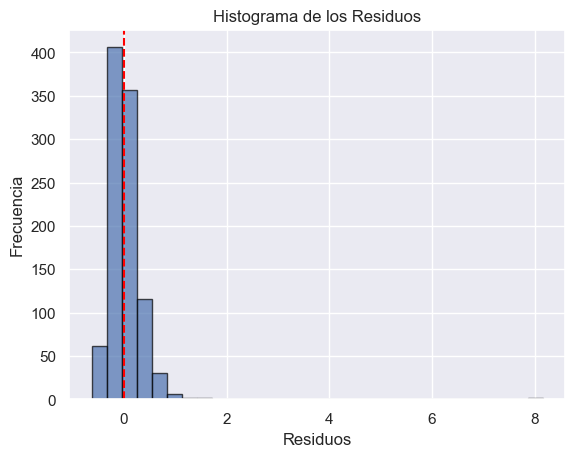

In [103]:
plt.hist(residuos, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.axvline(x=0, color='red', linestyle='--')  # Línea vertical para la media en x=0
plt.show()

#### HOMOCEDASTICIDAD (Varianza Constante)

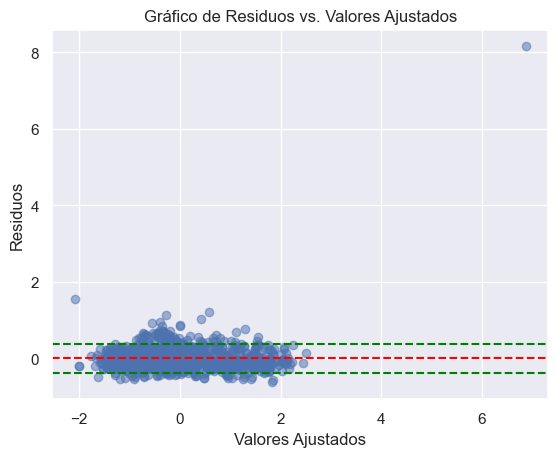

In [105]:
# Calcular la desviación estándar de los residuos
std_residuos = np.std(residuos)

# Crear el gráfico de dispersión de residuos
plt.scatter(y_pred_test, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Línea en y=0
plt.axhline(std_residuos, color='green', linestyle='--')  # Línea superior
plt.axhline(-std_residuos, color='green', linestyle='--')  # Línea inferior
plt.title('Gráfico de Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

##### EL GRÁFICO NOS MUESTRA QUE EFECTIVAMENTE NO HAY GRAN DISPERCIÓN DE LOS DATOS, POR TANTO TIENEN UNA VARIANZA CONSTANTE